<a href="https://colab.research.google.com/github/Suchy17/machine_learning_bootcamp/blob/main/14_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set(font_scale=1.3)
np.random.seed(42)

In [2]:
raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = [name.replace(' ', '_')[:-5] for name in all_data['feature_names']]
target_names = all_data['target_names']

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {target_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


In [3]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=200)


In [4]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=200)


In [5]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=200)


In [6]:

df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot('sepal_length', 'sepal_width', hue='target', data=df, legend='full', palette=sns.color_palette()[:3])


TypeError: scatterplot() got multiple values for argument 'data'

<Figure size 800x600 with 0 Axes>

In [8]:
df['target'].value_counts()

,count
target,
0.0,50
1.0,50
2.0,50


In [10]:

data = df.copy()
data = data[['sepal_length', 'sepal_width', 'target']]
target = data.pop('target')

data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [11]:
target.head()


,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [12]:

data = data.values
target = target.values.astype('int16')

In [13]:

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
classifier.fit(data, target)

DecisionTreeClassifier(max_depth=1, random_state=42)

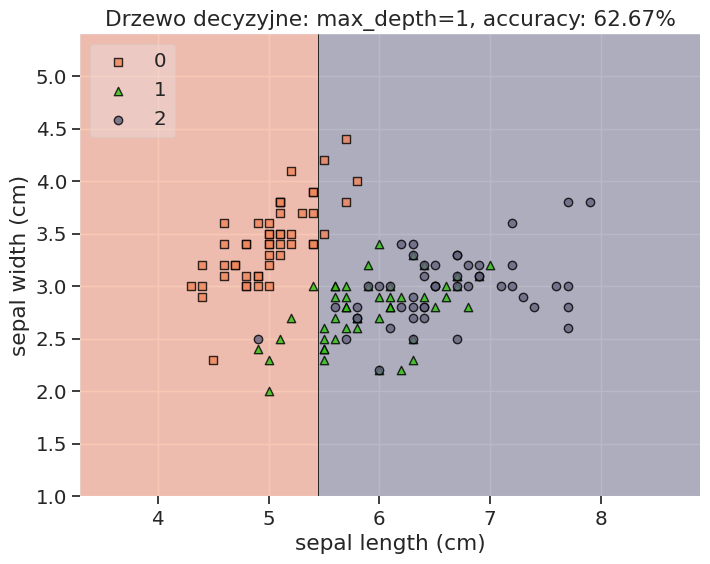

In [14]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(data, target)

plt.figure(figsize=(8, 6))
plot_decision_regions(data, target, classifier, legend=2, colors=colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')
plt.show()